In [220]:
import matplotlib.pyplot as plt
import numpy as np
import numpyro as npy
import numpyro.distributions as dist
import pandas as pd
from jax import random
import geopandas as gpd
import genomicsurveillance as gs ## misc branch on github

assert npy.__version__.startswith("0.8.0")
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({'axes.grid': True,
                     'grid.linestyle': ':',
                     'axes.spines.bottom': False,
          'axes.spines.left': False,
          'axes.spines.right': False,
          'axes.spines.top': False})

In [34]:
import re

In [2]:
import json, requests
import pandas as pd

In [139]:
def fetch_covspectrum(country, start, annot='pangoLineage'):
    url = f"https://dev-lapis.cov-spectrum.org/gisaid/v1/sample/aggregated?country={country}&dateFrom={start}&host=Human&accessKey=9Cb3CqmrFnVjO3XCxQLO6gUnKPd&fields=date,{annot},country"
    #url = f"https://dev-lapis.cov-spectrum.org/gisaid/v1/sample/aggregated?country={country}&dateFrom={start}&variantQuery=pangoLineage:X*|B*&host=Human&accessKey=9Cb3CqmrFnVjO3XCxQLO6gUnKPd&fields=date,{annot},country"
    foo = json.loads(requests.get(url).text)['data']
    f = pd.DataFrame.from_dict(foo)
    f.date = pd.to_datetime(f.date)
    return f.pivot(index=['country','date'], columns=annot)['count'].fillna(0).astype('int')

In [213]:
countries = ['Germany', 'USA','United Kingdom','Singapore',
             'India','Australia','South Africa','Denmark',
             'France','Belgium','Netherlands','Spain',
            'Brazil','Japan','New Zealand','Mexico']

In [214]:
start_date="2021-11-01"

In [215]:
genomes = pd.concat([fetch_covspectrum(country, start_date, annot='pangoLineage') for country in countries])

In [216]:
genomes = genomes.reindex(pd.MultiIndex.from_product(genomes.index.levels)).fillna(0).astype('int').drop(columns=np.nan)

In [217]:
vocs = ["B.1.1.529","BA.1","BA.1.1","BA.2","BA.4","BA.5","BA.5.2","BA.2.12.1","BA.2.3.20","BA.2.75", "BA.2.75.1","BA.2.75.2","BN.1","BA.4.6", "BF.7", "BF.11", "BF.13", "BF.14","CE.1","BQ.1","BQ.1.1","XBB"] + ["B.1.617.2"]#+ ["B.1.1.7","B.1.1.318","B.1.621","B.1.525","B.1.351","P.1","AY.43","AY.46.6","AY.4.2","AY.36.1"]

In [218]:
from genomicsurveillance.misc import alias, ancestor_matrix

In [221]:
G = genomes.values.reshape([len(genomes.index.levels[0]), len(genomes.index.levels[1]), -1])
lineages = genomes.columns.to_list()
merged_lineages, G, _ = gs.preprocess_lineage_tensor(lineage_tensor=G, 
                                                     lineage_list=[alias(x, anti_alias=True) for x in lineages], 
                                                     vocs=[alias(x, anti_alias=True) for x in lineages if x in vocs], #any([y in x for y in ["BA.4","BA.5","BA.2.12.1"]])], 
                                                     cutoff=500000)
merged_lineages

Dropped lineages []


['A',
 'B',
 'B.1.1.529',
 'B.1.1.529.1',
 'B.1.1.529.1.1',
 'B.1.1.529.2',
 'B.1.1.529.2.3.20',
 'B.1.1.529.2.12.1',
 'B.1.1.529.2.75',
 'B.1.1.529.2.75.1',
 'B.1.1.529.2.75.2',
 'B.1.1.529.2.75.5.1',
 'B.1.1.529.4',
 'B.1.1.529.4.6',
 'B.1.1.529.5',
 'B.1.1.529.5.2',
 'B.1.1.529.5.2.1.7',
 'B.1.1.529.5.2.1.11',
 'B.1.1.529.5.2.1.13',
 'B.1.1.529.5.2.1.14',
 'B.1.1.529.5.2.33.1',
 'B.1.1.529.5.3.1.1.1.1.1',
 'B.1.1.529.5.3.1.1.1.1.1.1',
 'B.1.617.2',
 'XAA',
 'XAB',
 'XAC',
 'XAD',
 'XAE',
 'XAF',
 'XAG',
 'XAH',
 'XAJ',
 'XAK',
 'XAL',
 'XAM',
 'XAN',
 'XAP',
 'XAQ',
 'XAR',
 'XAS',
 'XAT',
 'XAU',
 'XAV',
 'XAY',
 'XAZ',
 'XBB',
 'XBC',
 'XD',
 'XE',
 'XF',
 'XG',
 'XH',
 'XJ',
 'XK',
 'XL',
 'XM',
 'XN',
 'XP',
 'XQ',
 'XR',
 'XS',
 'XT',
 'XU',
 'XV',
 'XW',
 'XY',
 'XZ',
 'Unassigned']

In [222]:
G.sum((0,1))

array([1.600000e+01, 1.004600e+04, 2.044000e+03, 9.570990e+05,
       1.095294e+06, 1.527432e+06, 2.900000e+02, 2.547170e+05,
       8.416000e+03, 3.219000e+03, 1.284000e+03, 3.350000e+02,
       9.545600e+04, 2.968800e+04, 4.240280e+05, 4.348160e+05,
       1.071300e+04, 1.755000e+03, 7.870000e+02, 3.520000e+02,
       7.900000e+01, 1.319000e+03, 8.900000e+02, 1.178993e+06,
       9.500000e+01, 1.040000e+02, 6.300000e+01, 7.700000e+01,
       4.100000e+01, 5.600000e+01, 3.310000e+02, 2.000000e+01,
       9.100000e+01, 1.310000e+02, 1.160000e+02, 1.360000e+02,
       6.800000e+01, 7.800000e+01, 5.000000e+00, 5.400000e+01,
       1.450000e+02, 9.700000e+01, 7.700000e+01, 6.200000e+01,
       2.300000e+01, 1.256000e+03, 4.690000e+02, 1.300000e+01,
       3.300000e+01, 2.592000e+03, 3.300000e+01, 4.750000e+02,
       1.630000e+02, 6.000000e+00, 2.500000e+01, 1.190000e+02,
       4.530000e+02, 2.700000e+02, 5.700000e+01, 1.270000e+02,
       1.820000e+02, 5.900000e+01, 1.400000e+01, 1.5000

In [223]:
baseline = 'B.1.617.2'
o = [merged_lineages.index(x) for x in merged_lineages if x != baseline and (not x.startswith("X") or x in vocs) and not x == 'Unassigned'] + [merged_lineages.index(baseline)]
G = G[:,:,o]
merged_lineages = [merged_lineages[x] for x in o]
merged_lineages

['A',
 'B',
 'B.1.1.529',
 'B.1.1.529.1',
 'B.1.1.529.1.1',
 'B.1.1.529.2',
 'B.1.1.529.2.3.20',
 'B.1.1.529.2.12.1',
 'B.1.1.529.2.75',
 'B.1.1.529.2.75.1',
 'B.1.1.529.2.75.2',
 'B.1.1.529.2.75.5.1',
 'B.1.1.529.4',
 'B.1.1.529.4.6',
 'B.1.1.529.5',
 'B.1.1.529.5.2',
 'B.1.1.529.5.2.1.7',
 'B.1.1.529.5.2.1.11',
 'B.1.1.529.5.2.1.13',
 'B.1.1.529.5.2.1.14',
 'B.1.1.529.5.2.33.1',
 'B.1.1.529.5.3.1.1.1.1.1',
 'B.1.1.529.5.3.1.1.1.1.1.1',
 'XBB',
 'B.1.617.2']

In [224]:
merged_lineages_alias = [alias(x) for x in merged_lineages]
merged_lineages_alias

['A',
 'B',
 'B.1.1.529',
 'BA.1',
 'BA.1.1',
 'BA.2',
 'BA.2.3.20',
 'BA.2.12.1',
 'BA.2.75',
 'BA.2.75.1',
 'BA.2.75.2',
 'BN.1',
 'BA.4',
 'BA.4.6',
 'BA.5',
 'BA.5.2',
 'BF.7',
 'BF.11',
 'BF.13',
 'BF.14',
 'CE.1',
 'BQ.1',
 'BQ.1.1',
 'XBB',
 'B.1.617.2']

In [225]:
dict(zip(merged_lineages_alias,G.sum((0,1))))

{'A': 16.0,
 'B': 10046.0,
 'B.1.1.529': 2044.0,
 'BA.1': 957099.0,
 'BA.1.1': 1095294.0,
 'BA.2': 1527432.0,
 'BA.2.3.20': 290.0,
 'BA.2.12.1': 254717.0,
 'BA.2.75': 8416.0,
 'BA.2.75.1': 3219.0,
 'BA.2.75.2': 1284.0,
 'BN.1': 335.0,
 'BA.4': 95456.0,
 'BA.4.6': 29688.0,
 'BA.5': 424028.0,
 'BA.5.2': 434816.0,
 'BF.7': 10713.0,
 'BF.11': 1755.0,
 'BF.13': 787.0,
 'BF.14': 352.0,
 'CE.1': 79.0,
 'BQ.1': 1319.0,
 'BQ.1.1': 890.0,
 'XBB': 469.0,
 'B.1.617.2': 1178993.0}

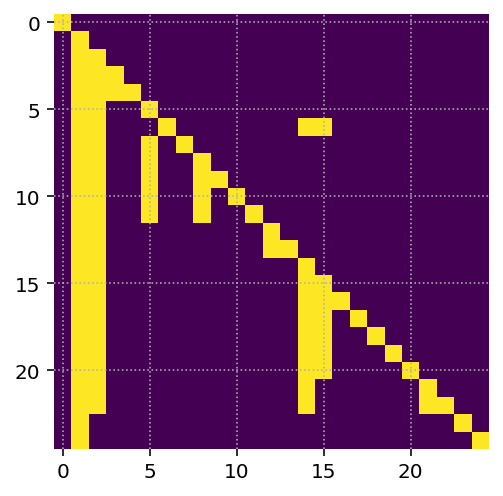

In [226]:
m = merged_lineages.copy()
m[m.index('B.1.1.529.2.3.20')] = 'B.1.1.529.5.2.20' ## Treat BA.2.3.20 as if BA.5.2 derived
#m[m.index('XBB')] = 'B.1.1.529.5.2.21' ## Treat XBB as if BA.5.2 derived
A = ancestor_matrix(m)
plt.imshow(A)

In [227]:
#A[1:-1,merged_lineages.index("B.1.1.7")] = 1
#A[merged_lineages.index('B.1.1.529'):-4,merged_lineages.index("B.1.617.2")] = 1
#plt.imshow(A)

In [228]:
seq_index = np.arange(G.shape[1])

In [229]:
GG = G.copy() 
CC = np.ones([G.shape[0], G.shape[1]]) * 1000
#CC[-1, -2:] = np.nan #cases_land.columns.to_list().index(np.datetime64("2022-10-03"))

In [230]:
B0 = np.ones([2,G.shape[1], 2])
B0[1] = 0

# Genomic surveillance analysis across the World

In [231]:
import importlib
importlib.reload(gs.misc.misc)
importlib.reload(gs.misc)
from genomicsurveillance.misc import MultiLineageTimeShift, plot_lad, plot_growth_rates, alias

In [232]:
from numpyro.infer import Trace_ELBO

### Model
Multi-lineage model with variable growth rates (random effect) across states

In [233]:
model = MultiLineageTimeShift(
    CC,
    GG,    
    seq_index,
    np.repeat(1e6, CC.shape[0]),#np.concatenate([capita.values, capita.values.sum().reshape(1)])[[-1]],
    #auto_correlation=0.5,
    #linearize=True,
    #arma = arma2,
    b_scale=0.01,
    b0_scale=0.3,
    c_scale=5,
    c0_scale=5,
    c0_loc=-10,
    beta_scale= np.append(10.,np.repeat(10., B0.shape[2]-1)),# np.concatenate([np.repeat(1., knots.num_long_basis), np.repeat(.1, knots.num_short_basis)]),
    tau=4.6,
    basis=B0, #knots.basis,
    shift=7,  
    alpha0=.001,#.001,
    alpha1=1000., 
    #week=True,
    #fit_logits=True,#True,
    ancestor_matrix=A,
    #model_kwargs={'handler':'SVI', 'loss':Trace_ELBO(num_particles=5), 'num_epochs':10000, 'lr':0.001, 'num_samples': 100}
    model_kwargs={'handler':'SVI', 'loss':Trace_ELBO(num_particles=10), 'num_epochs':10000, 'lr':0.01, 'lrd': 0.1 ** (1/10000), 'num_samples': 100, 'log_freq':500}
    #model_kwargs={'handler':'SVI', 'loss':Trace_ELBO(num_particles=100), 'num_epochs':2000, 'lr':0.03, 'lrd': 0.5 ** (1/2000), 'num_samples': 100, 'log_freq':200}

)

In [234]:
model.fit(num_epochs=500)

SVI step 0 / 500 | 0 %


Text(0, 0.5, 'ELBO')

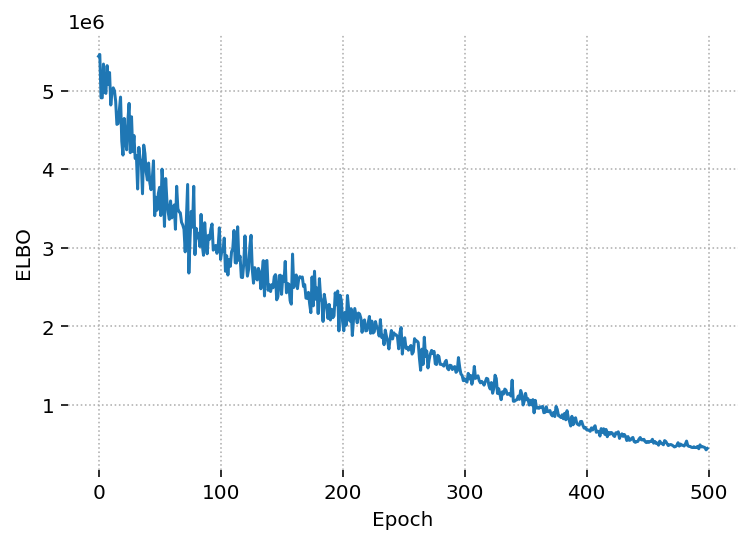

In [235]:
plt.plot(model.loss)
#plt.ylim((0,1e6))
plt.xlabel('Epoch')
plt.ylabel('ELBO')

In [236]:
model.fit(num_epochs=8000)

SVI step 0 / 8,000 | 0 %
SVI step 500 / 8,000 | 6 %
SVI step 1,000 / 8,000 | 12 %
SVI step 1,500 / 8,000 | 19 %
SVI step 2,000 / 8,000 | 25 %
SVI step 2,500 / 8,000 | 31 %
SVI step 3,000 / 8,000 | 38 %
SVI step 3,500 / 8,000 | 44 %
SVI step 4,000 / 8,000 | 50 %
SVI step 4,500 / 8,000 | 56 %
SVI step 5,000 / 8,000 | 62 %
SVI step 5,500 / 8,000 | 69 %
SVI step 6,000 / 8,000 | 75 %
SVI step 6,500 / 8,000 | 81 %
SVI step 7,000 / 8,000 | 88 %
SVI step 7,500 / 8,000 | 94 %


Text(0, 0.5, 'ELBO')

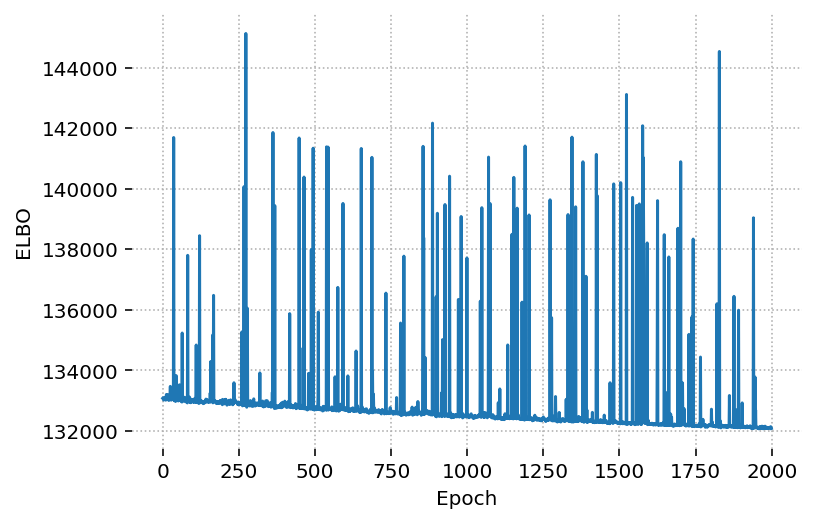

In [237]:
plt.plot(model.loss[-2000:])
plt.xlabel('Epoch')
plt.ylabel('ELBO')
#plt.ylim((model.loss[2000],model.loss[1200]))

In [238]:
lineage_colors = {'B.1.1.529':'C7',
                 'BA.1': 'rebeccapurple',#'mistyrose', #
                 'BA.1.1': 'C4',#"lavender", #
                 'BA.2':"C1", 
                 'BA.2.12.1':"C6",
                  'BA.2.3.20':'orange',
                 'BA.2.75':"orangered",
                  'BA.2.75.1':"salmon",
                  'BA.2.75.2':"C3",
                   'BN.1':"tomato",
                 'BA.4':"C8",
                 'BA.4.6': 'peru',
                 'BA.5':"C9",
                  'BA.5.2': 'darkcyan',
                  "BF.7":"limegreen",
                  'BF.11':"C2",
                  'BF.13':"yellowgreen",
                  'BF.14':'green',
                  'CE.1':'darkgreen',
                   'BQ.1':'aquamarine',
                  'BQ.1.1':'mediumspringgreen',
                  'XBB': 'black',
                 #'Other':"C7",
                 'B.1.617.2': 'C0',
                 'AY.4.2': 'lightblue',
                  'AY.36.1': 'steelblue',
                  'AY.43': 'skyblue',
                  'AY.46.6': 'lightsteelblue',
                  'A': 'lightgrey',
                  'B': 'lightgrey',
                  'B.1.1.7': 'navy' ,
                  'B.1.351': 'black',
                  'P.1' : 'slategrey',
                  'B.1.525':'C7',
                  'B.1.1.318': 'grey',
                  'B.1.621':'grey'
                 } #"aliceblue"}

In [239]:
escape_lineages = [x for x in merged_lineages_alias if re.match("|".join(["BA.2.75", "BA.4.6","BF","BQ","BN","BA.2.3.20","CE.1","XBB"]), x)]

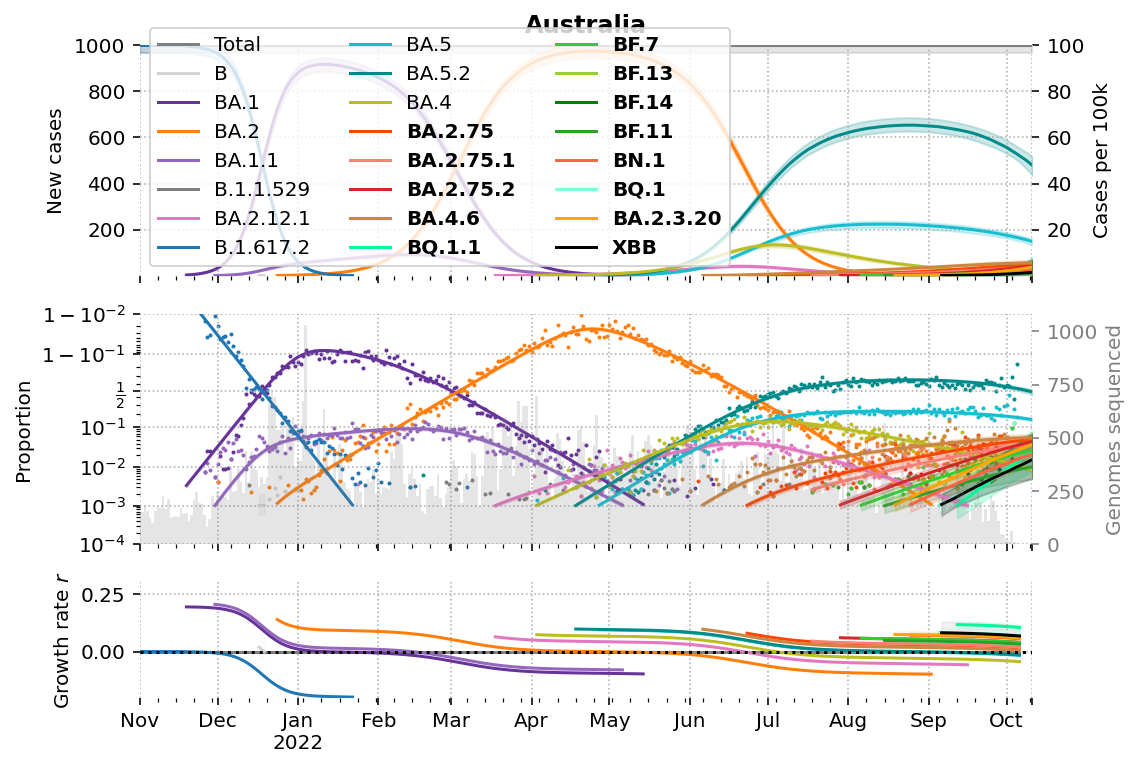

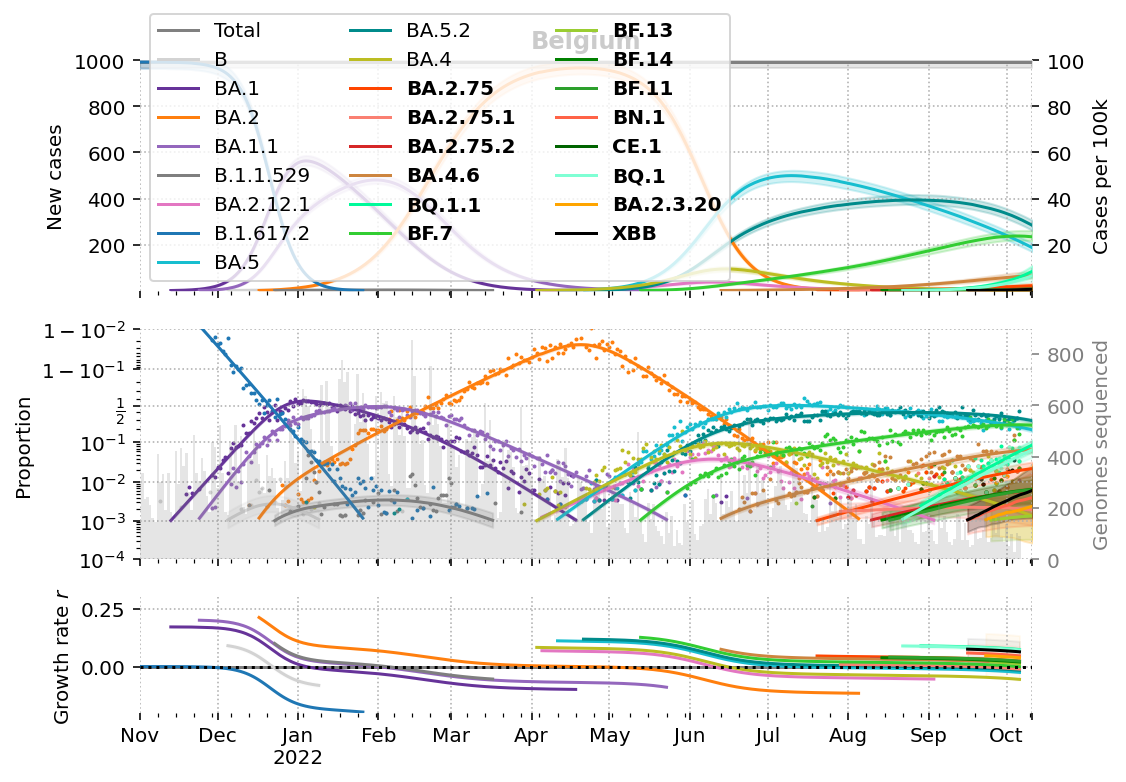

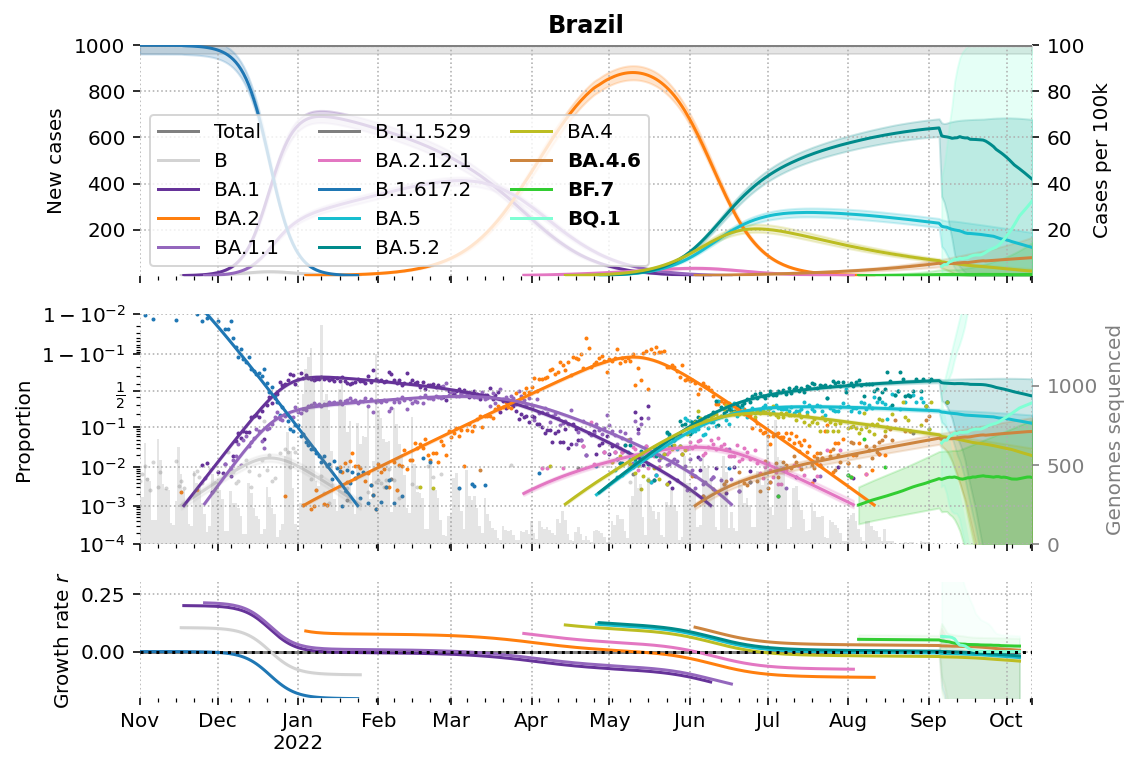

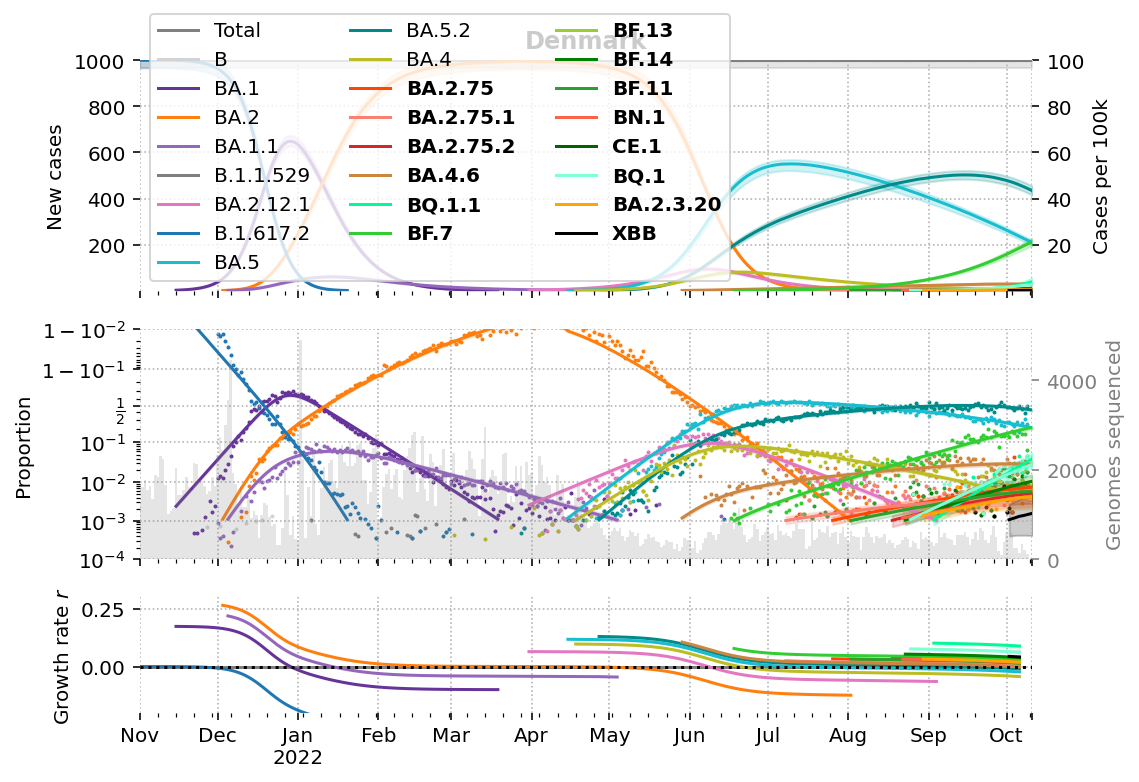

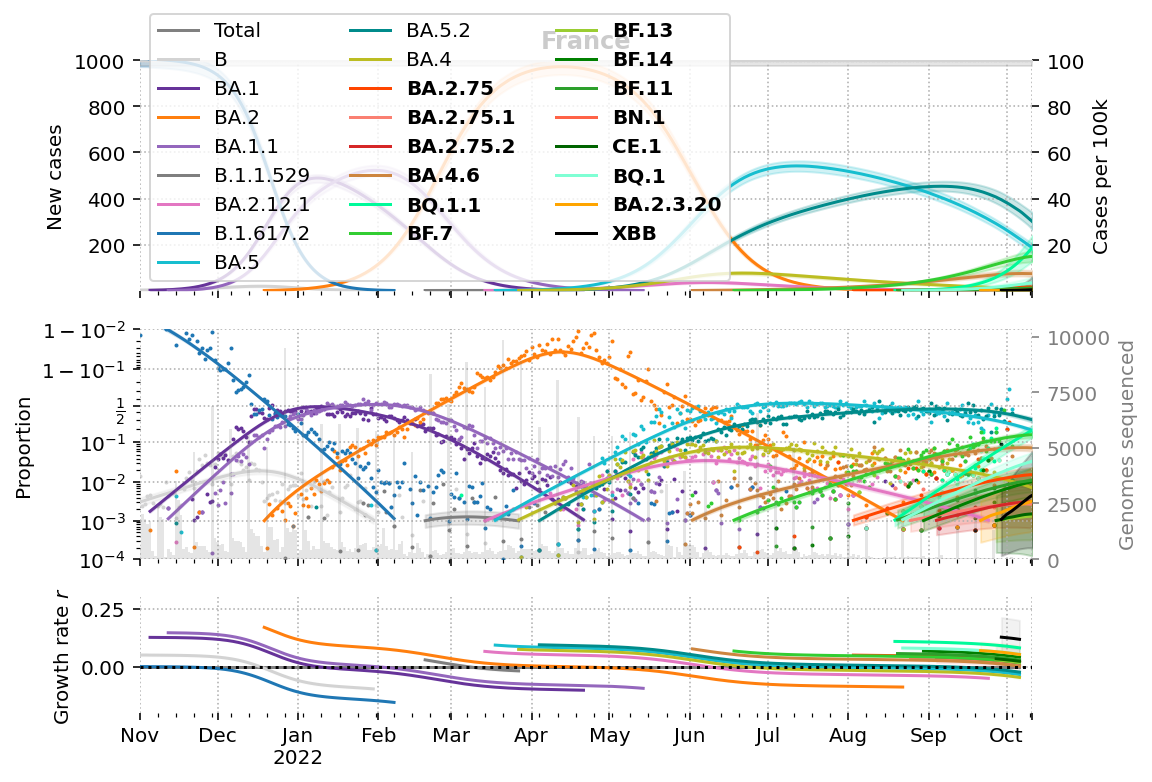

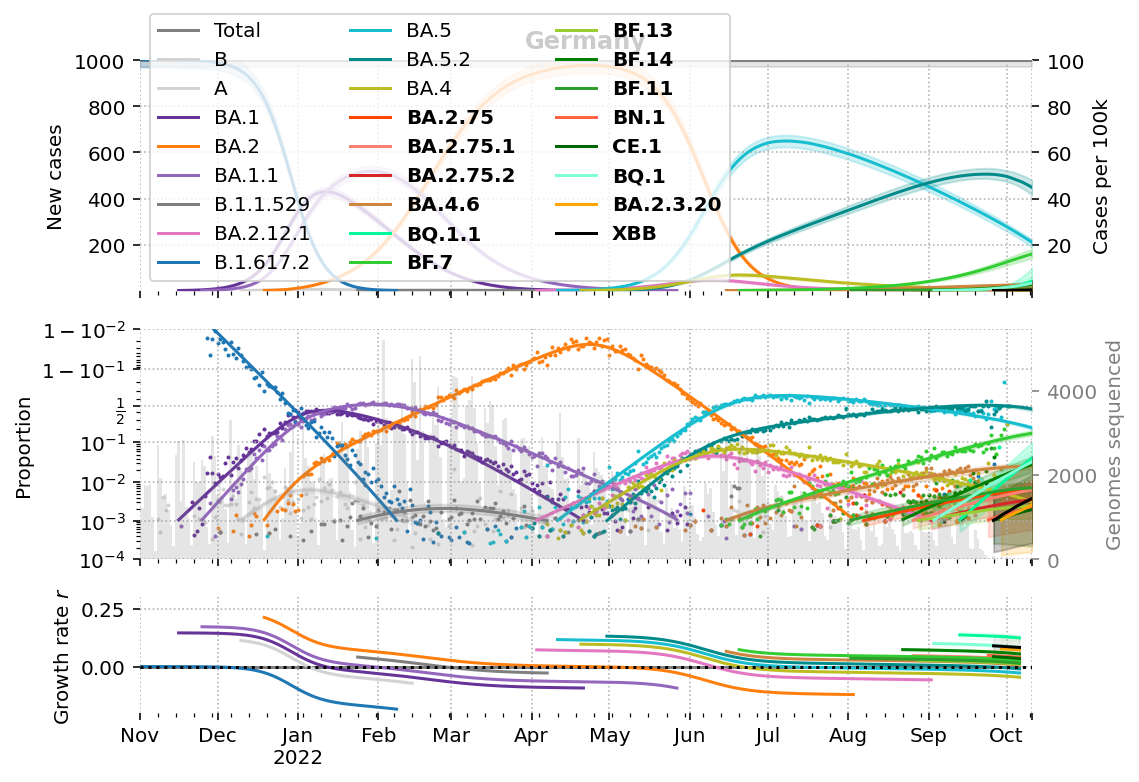

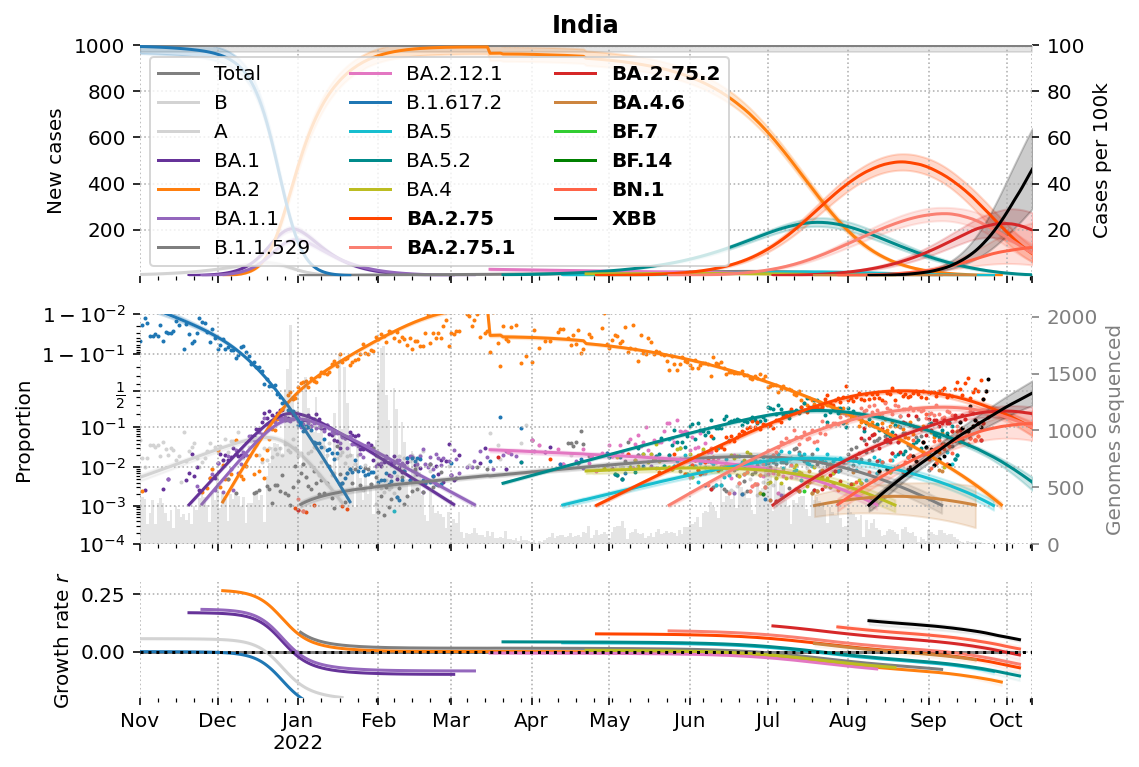

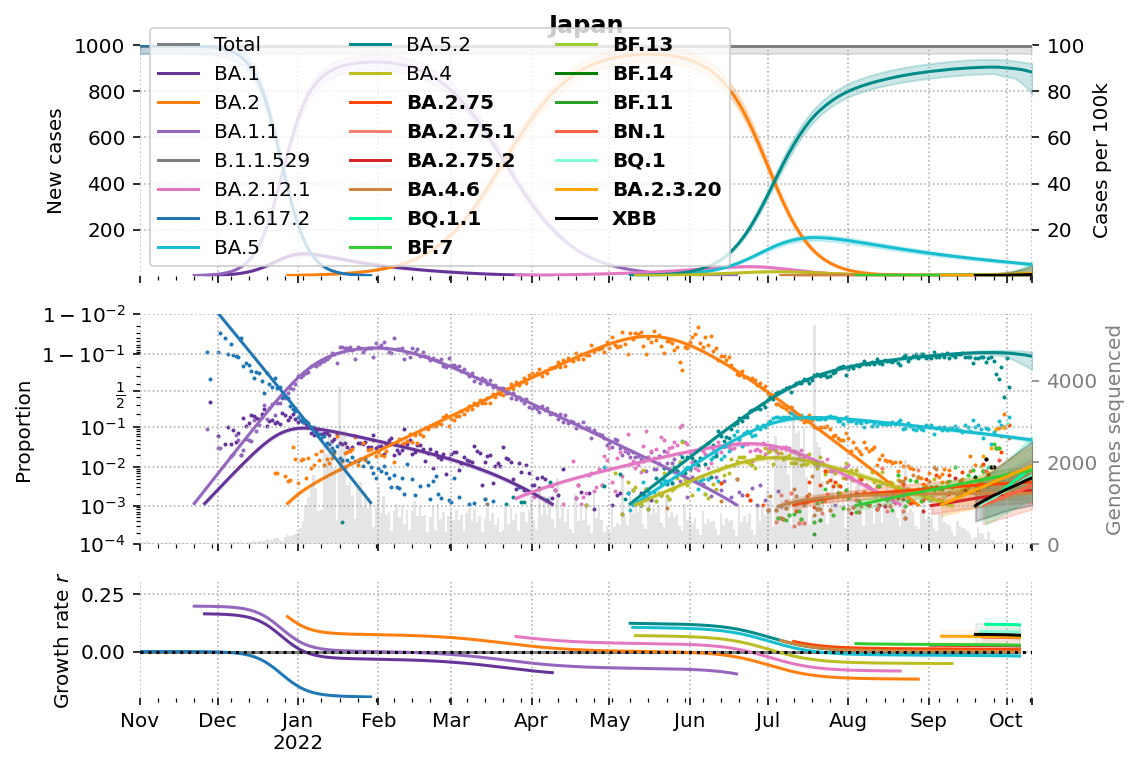

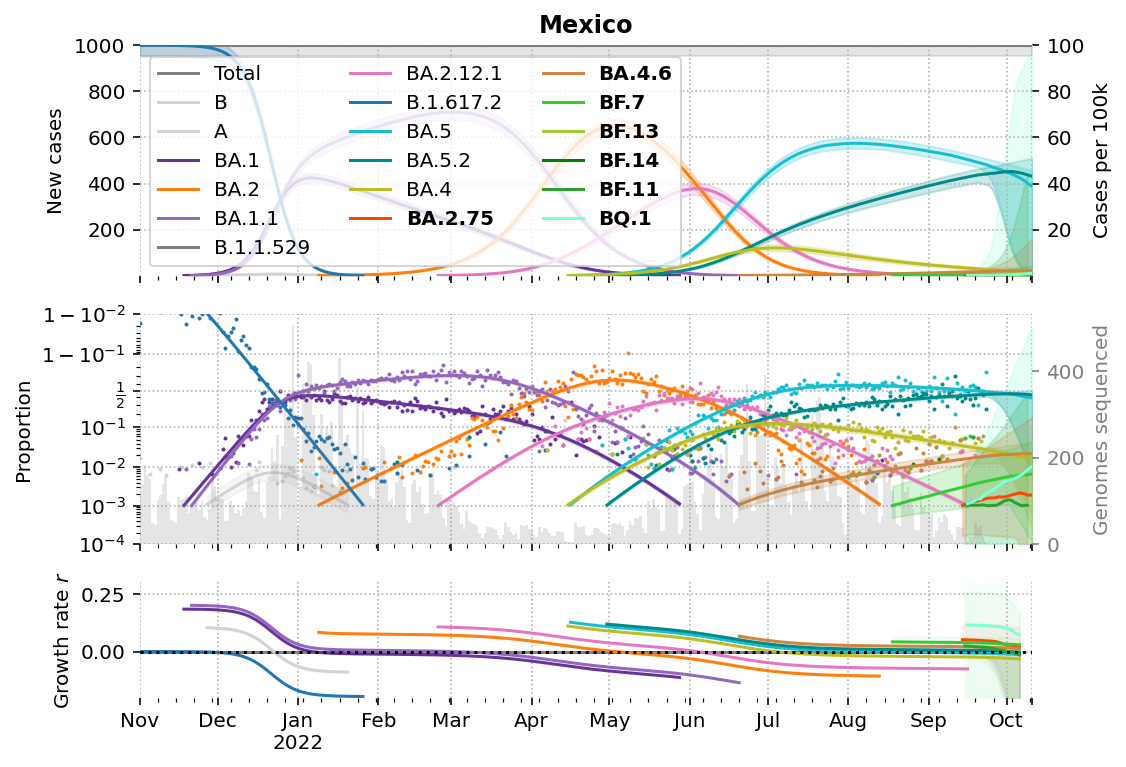

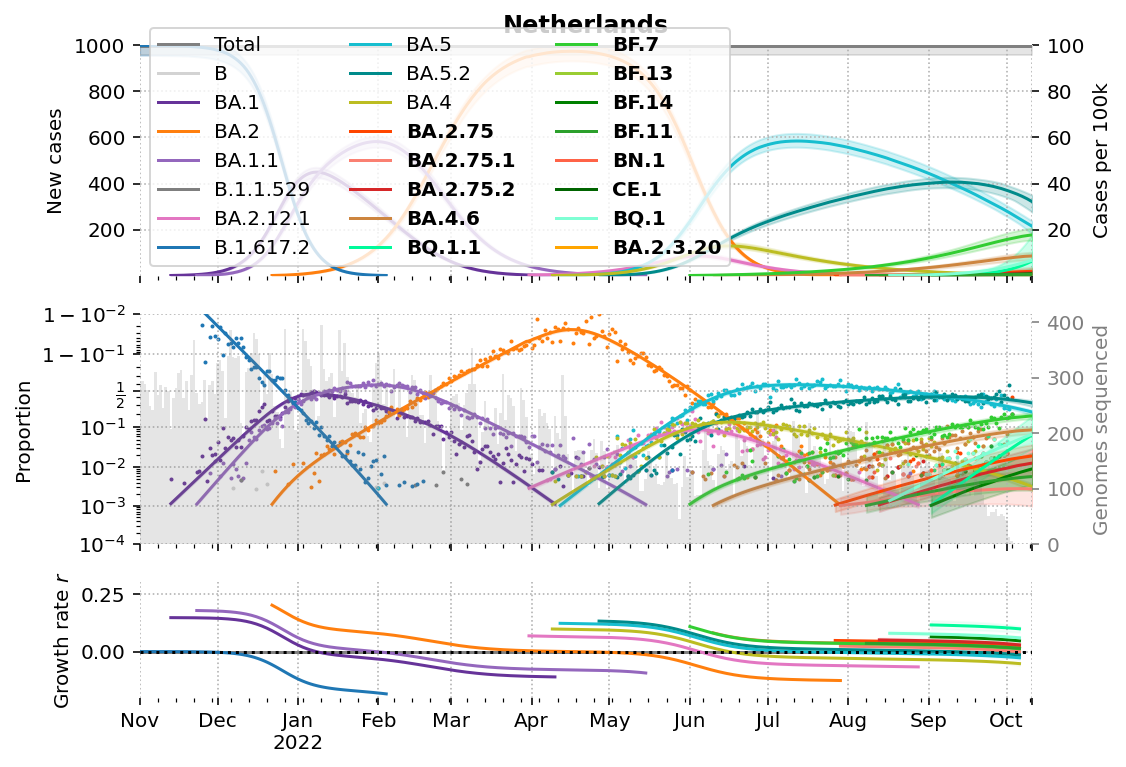

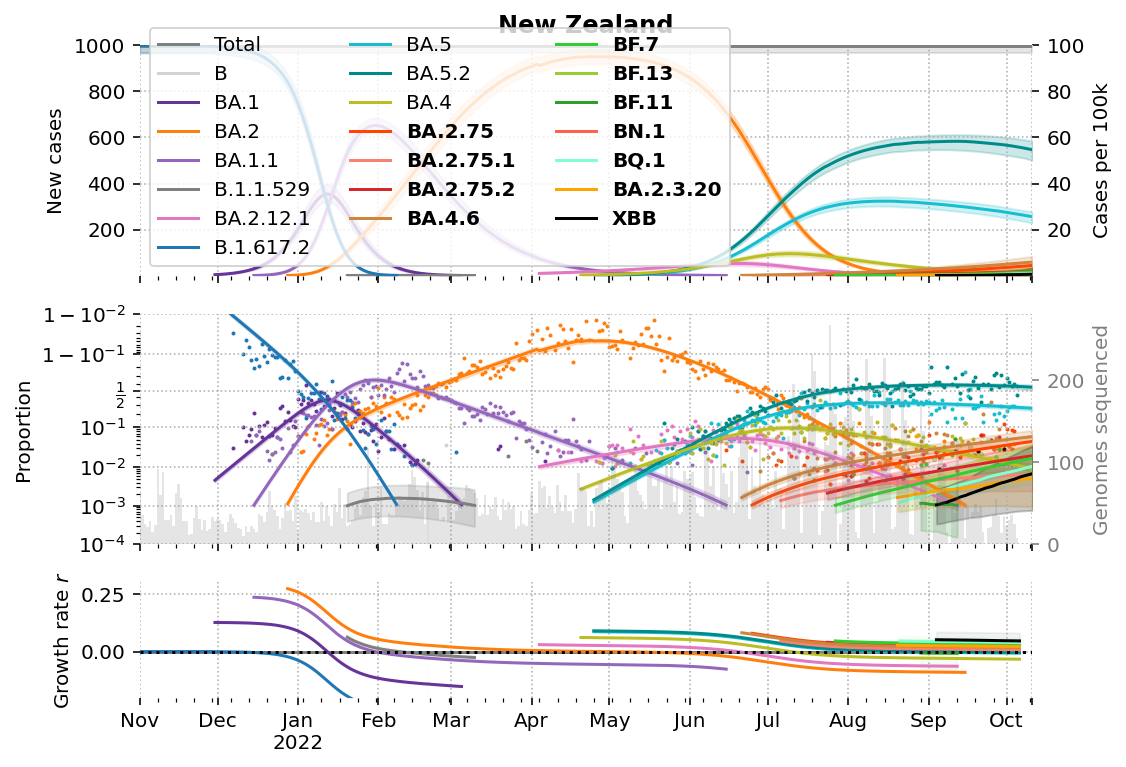

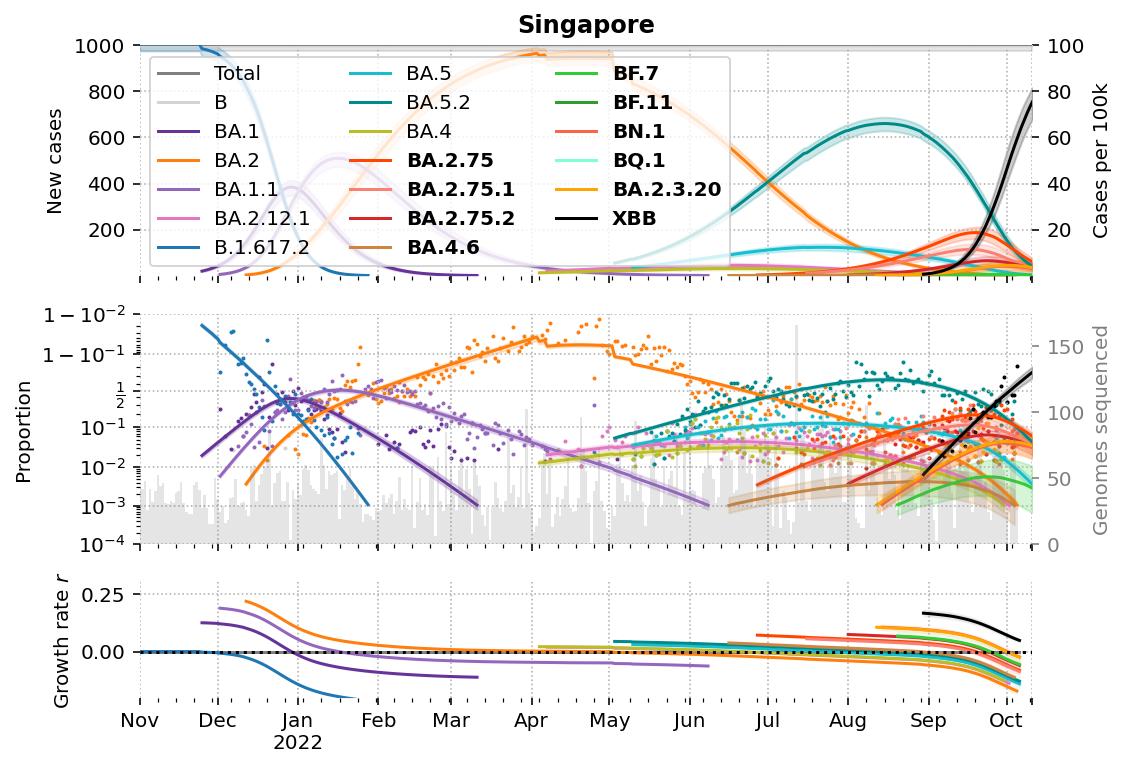

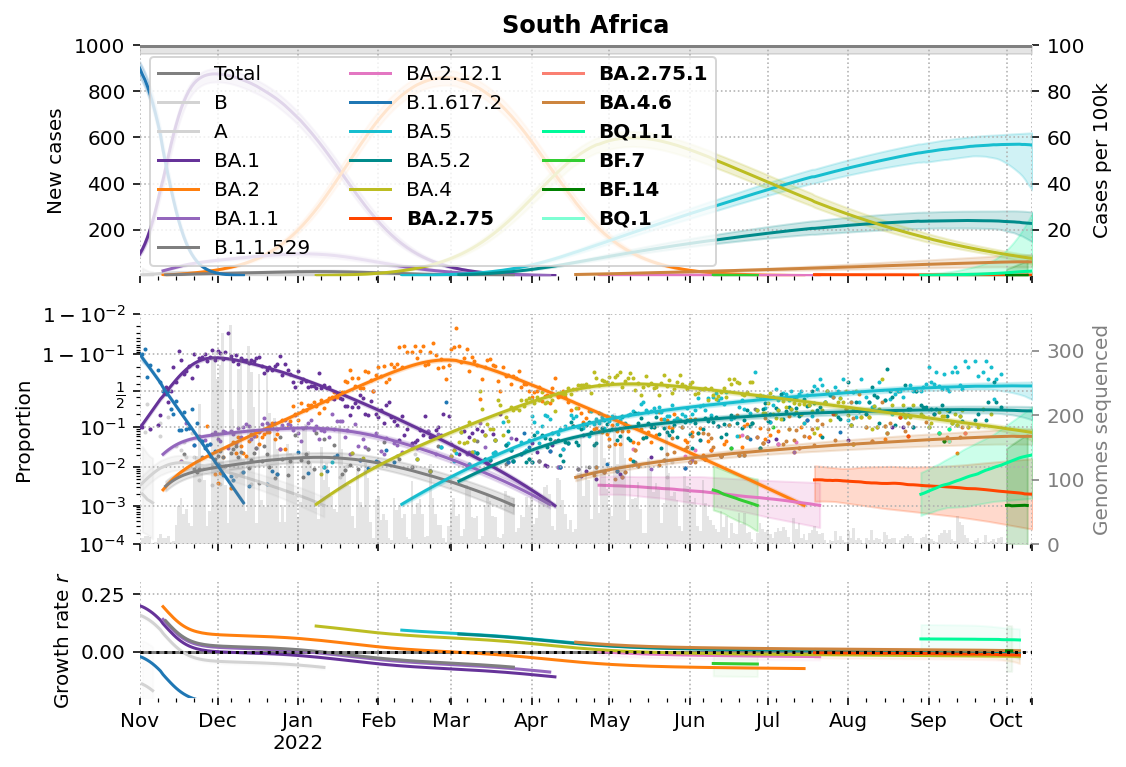

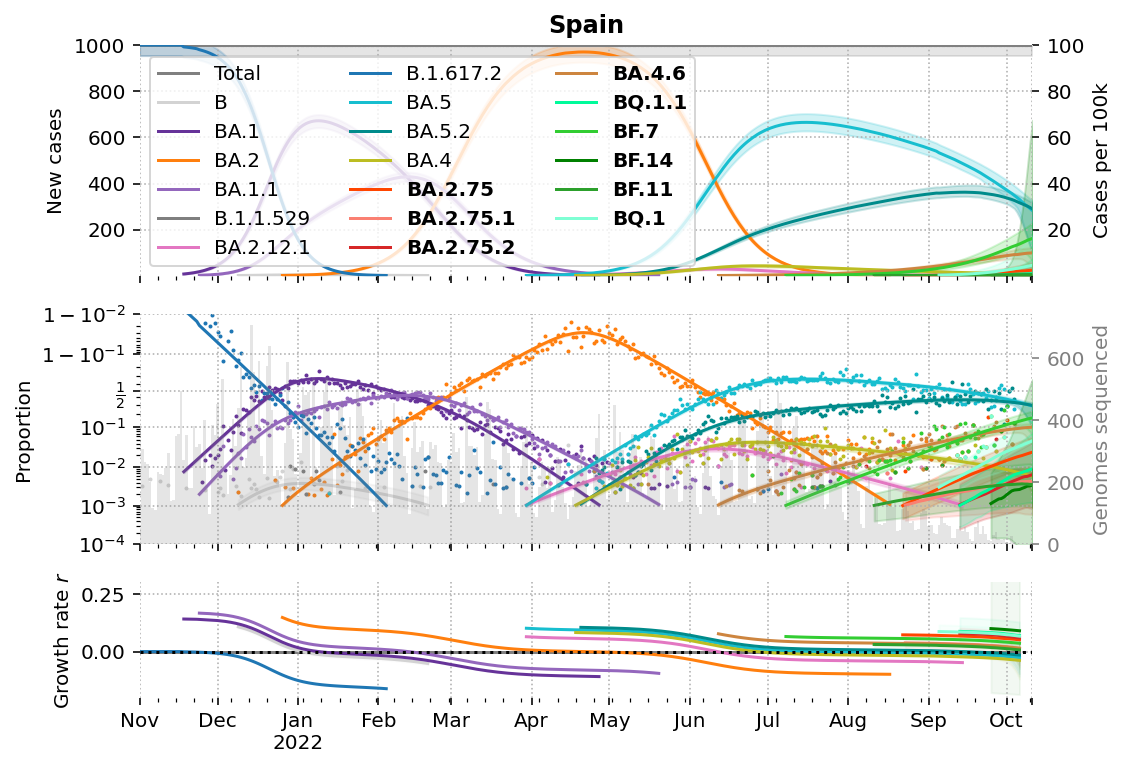

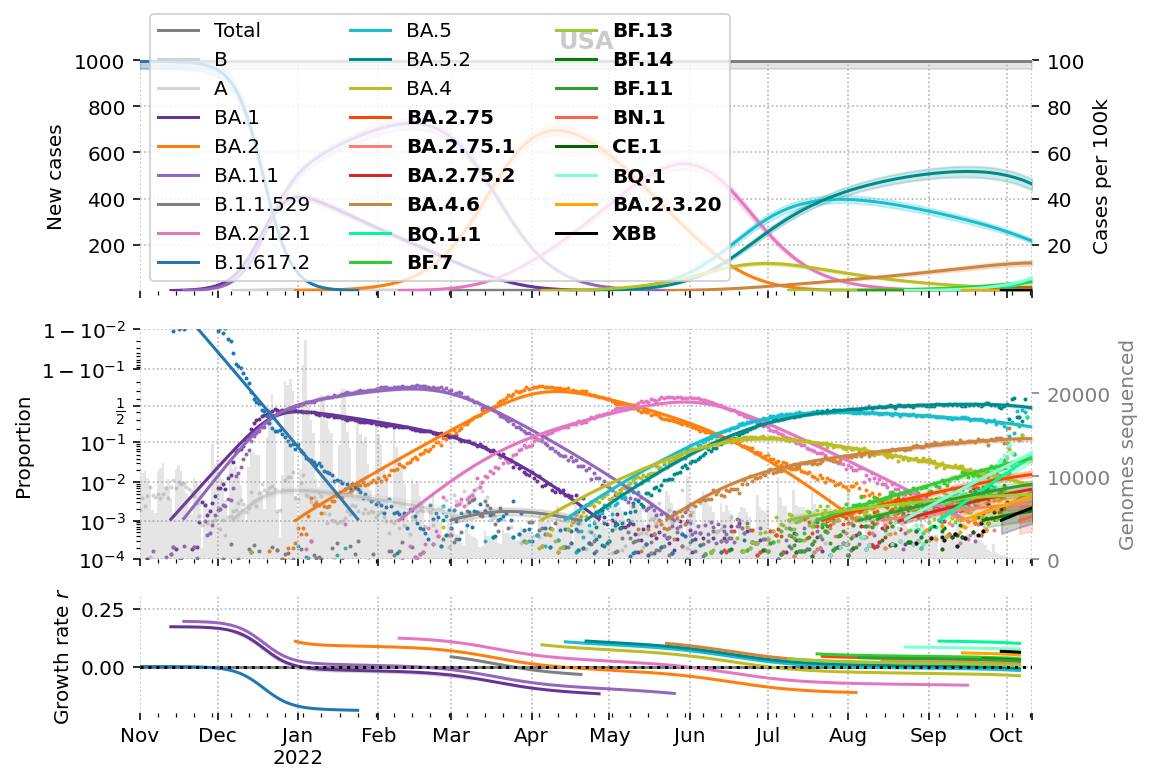

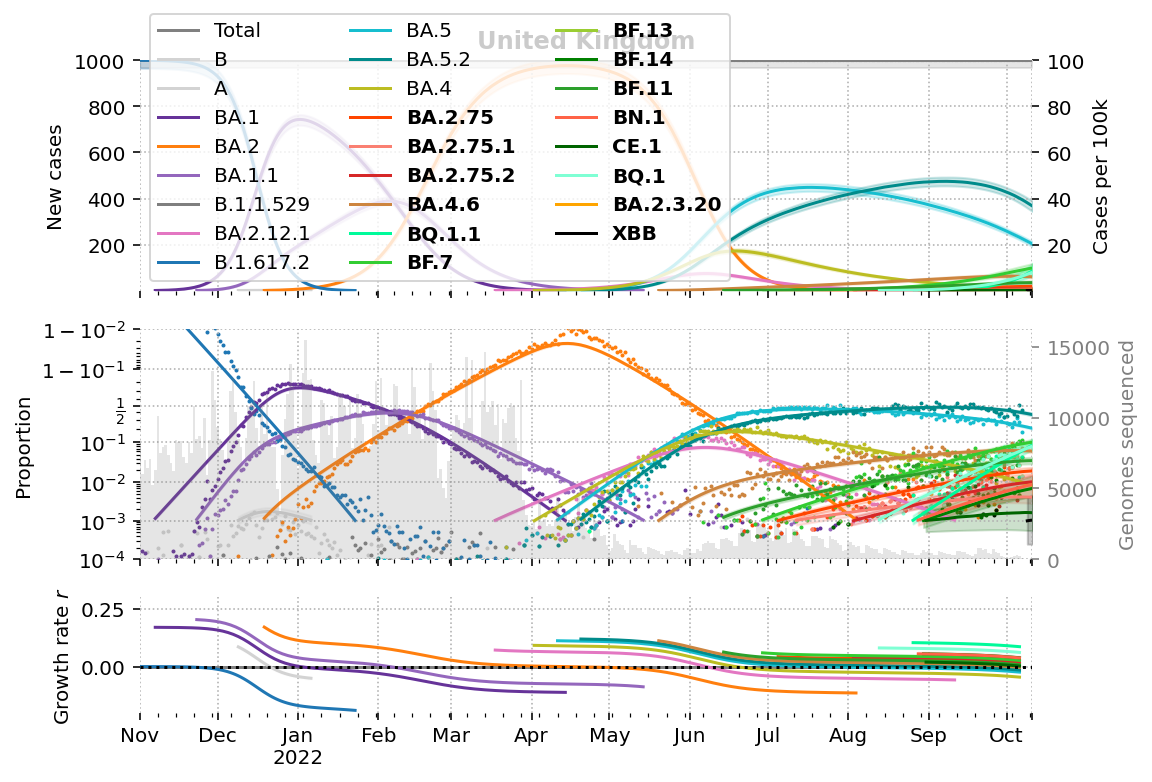

In [240]:
#from genomicsurveillance.plots.england import plot_lad, 
plt.rcParams['font.sans-serif'] = ["DejaVu Sans"]
from matplotlib import gridspec
from genomicsurveillance.plots.england import plot_median_and_ci
#from matplotlib import rc
#rc('text', usetex=False)
x = (GG.sum(0).cumsum(0)>0).argmax(0)
o = np.argsort(x + np.argsort(merged_lineages))
for i,r in enumerate(genomes.index.levels[0].to_list()): #[(-1, "Germany")]:#enumerate(cases_land.index.to_list() + ["Germany"]):
    w = o#np.where(GG[i].sum(0) >= 3)[0]
    #w = list(set(w) - set([0,GG.shape[2]-2]))
    #w = [w[-1]] + w[:-1]
    #plt.set_cmap("tab20")
    col = [lineage_colors[x] for x in merged_lineages_alias]
    plot_lad(model, i, CC, GG, seq_index, start_date=start_date, show_start_date=start_date,
        lin = w,
        labels = np.array(merged_lineages_alias)[w], #[x if not x in ["BA.2.75", "BA.4.6","BA.5.2.1.7","BA.5.2.1.11"] else r"$\bf{"+x+"}$" for x in merged_lineages_alias])[w],#genomes.columns[w],
        #lin_colors=np.array(5*['C7','C3',"C4","C1", "C6","C8" ,"C9", "C7","C0"])[w],#, "C6", "C1","C8"],
        lin_colors=np.array(5*col)[w],#, "C6", "C1","C8"],
        #labels=[alias(y) if alias(y) != "AY.121" else "Orf3a:202L" for y in x],#["B.1.1.7", 'Delta', "AY.4", 'B.1.617.2.5', "B.1.177"],
        case_color="grey",
        case_markercolor="lightgrey",
             lin_marker=".",
             lin_marker_size=2,
            figsize=(8,6),
            prop_err=False,
            show_Rt=False)

    ax=plt.gcf().get_axes()
    
    ax[0].set_title(r, size=12, weight='bold')
    #ax[0].set_yscale('log')
    ax[0].set_ylim((1,None))
   
    #ax[1].grid(which='both', ls=":")
    #ax[0].legend(loc='center left')
    #ax[2].set_ylim((-0.2,0.3))
    #ax[3].grid(False)
    
    #for a in ax:
        #a.xaxis.set_major_formatter(pd.plotting._matplotlib.converter.TimeSeries_DateFormatter("D"))
        #for s in a.spines:
        #    a.spines[s].set_visible(True)
    #fig = plt.gcf()
    #plt.tight_layout()
    ax[0].set_ylim((None, np.nanmax(CC[i,:])))
    ax[1].set_yscale("logit")
    ax[1].set_ylim((1e-4,1-1e-2))
    ax[2].set_ylim((-.2,.3))
    ax[1].get_legend().remove()
    ax[2].get_legend().remove()
    #ax[2].set_xlim(("2022-06-01",None))
    #ax[0].legend("off")
    for i in range(3):
        ax[i].set_position(gridspec.GridSpec(3, 1, height_ratios=[1,1, 0.5])[i].get_position(plt.gcf()))
    #ax[2].legend(loc="upper left")
    ax[2].axhline(0, color='k', ls=":")
    leg = ax[0].legend(loc="lower left", ncol=3)
    for l in leg.get_texts():
        if l.get_text() in escape_lineages:
            l.set_weight('bold')
    plt.show()
    #plt.gcf().set_size_inches(12,12)

In [241]:
b = np.array(model.posterior['b1'])
b[b==0] = np.nan
b[...,-1]= 0
r = pd.DataFrame((b - b[...,[1]]).mean((0,2)), columns=merged_lineages_alias, index=genomes.index.levels[0].to_list())

In [254]:
genomes.index.levels[0]

Index(['Australia', 'Belgium', 'Brazil', 'Denmark', 'France', 'Germany',
       'India', 'Japan', 'Mexico', 'Netherlands', 'New Zealand', 'Singapore',
       'South Africa', 'Spain', 'USA', 'United Kingdom'],
      dtype='object', name='country')

In [260]:
#s.boxplot(), index=pd.MultiIndex.from_product([np.arange(s.shape[0]), genomes.index.levels[0]]), columns=merged_lineages_alias)[[x for x in merged_lineages_alias if alias(x, anti_alias=True).startswith("B.1.1.529") or x in escape_lineages]]#.drop(columns="BA.2.3.20")
s


B.1.1.529      BA.1    BA.1.1      BA.2  BA.2.3.20  \
country                                                                 
Australia      0   -0.101209 -0.188099 -0.172998 -0.095070   0.069371   
               1   -0.098225 -0.188777 -0.172280 -0.094862   0.066686   
               2   -0.102832 -0.188888 -0.173203 -0.095203   0.075949   
               3   -0.102583 -0.188596 -0.173123 -0.094891   0.079653   
               4   -0.107088 -0.188178 -0.172911 -0.094805   0.079562   
...                      ...       ...       ...       ...        ...   
United Kingdom 95  -0.173945 -0.224027 -0.187566 -0.111873   0.087767   
               96  -0.173518 -0.224059 -0.187545 -0.111861  -0.013689   
               97  -0.173012 -0.223086 -0.187031 -0.111690  -0.023448   
               98  -0.173328 -0.223845 -0.187295 -0.111602   0.001454   
               99  -0.171188 -0.223217 -0.187130 -0.111522  -0.055475   

                   BA.2.12.1   BA.2.75  BA.2.75.1  BA.2.75.2      BN.1  ...  \
country                                                                 ...   
Australia      0   -0.050742  0.032298   0.032216   0.057335  0.069095  ...   
               1   -0.050782  0.032168   0.033565   0.054912  0.073723  ...   
               2   -0.051855  0.031944   0.035483   0.053645  0.070270  ...   
               3   -0.051043  0.033490   0.035256   0.056227  0.072336  ...   
               4   -0.050937  0.032547   0.035269   0.056337  0.067512  ...   
...                      ...       ...        ...        ...       ...  ...   
United Kingdom 95  -0.048364  0.038180   0.022772   0.047639  0.068628  ...   
               96  -0.048515  0.037599   0.022095   0.043157  0.059493  ...   
               97  -0.047948  0.036954   0.025768   0.043927  0.056170  ...   
               98  -0.047919  0.037301   0.023916   0.044352  0.058363  ...   
               99  -0.047690  0.038799   0.023871   0.043270  0.055224  ...   

                   BA.5    BA.5.2      BF.7     BF.11     BF.13     BF.14  \
country                                                                     
Australia      0    0.0  0.001910  0.056795  0.049121  0.005297  0.041178   
               1    0.0  0.001755  0.050808  0.047978  0.028261  0.067823   
               2    0.0  0.002120  0.055741  0.051567  0.026475 -0.011452   
               3    0.0  0.001703  0.054380  0.046197  0.018956 -0.089675   
               4    0.0  0.002220  0.055766  0.045456  0.038534  0.041231   
...                 ...       ...       ...       ...       ...       ...   
United Kingdom 95   0.0  0.008914  0.050495  0.030418  0.030303  0.065467   
               96   0.0  0.008643  0.051533  0.030482  0.026101  0.054840   
               97   0.0  0.009023  0.051715  0.034169  0.018646  0.057112   
               98   0.0  0.009046  0.049974  0.031373  0.039381  0.066499   
               99   0.0  0.009026  0.049217  0.032164  0.036348  0.058719   

                       CE.1      BQ.1    BQ.1.1       XBB  
country                                                    
Australia      0        NaN  0.077631  0.121363  0.090666  
               1        NaN  0.114227  0.123610  0.099602  
               2        NaN  0.077899  0.129105  0.083327  
               3        NaN  0.090492  0.136324  0.108841  
               4        NaN  0.097313  0.115327  0.073199  
...                     ...       ...       ...       ...  
United Kingdom 95  0.027949  0.083535  0.110920  0.046870  
               96  0.014952  0.087941  0.109424  0.066222  
               97  0.028680  0.091523  0.112266  0.070685  
               98  0.022134  0.083457  0.110032  0.035401  
               99  0.026152  0.083301  0.110668  0.078530  

[1600 rows x 22 columns]

In [281]:
s.mean(level=0)

B.1.1.529      BA.1    BA.1.1      BA.2  BA.2.3.20  BA.2.12.1  \
country                                                                         
Australia       -0.101054 -0.188742 -0.172840 -0.094972   0.075643  -0.051123   
Belgium         -0.175111 -0.209873 -0.179507 -0.110298   0.063438  -0.044090   
Brazil          -0.137307 -0.189013 -0.175686 -0.108134        NaN  -0.073568   
Denmark         -0.147431 -0.219592 -0.160950 -0.119013   0.042768  -0.054182   
France          -0.106048 -0.182638 -0.161976 -0.081906   0.085157  -0.031167   
Germany         -0.145920 -0.208734 -0.181485 -0.115265   0.100362  -0.046249   
India           -0.024008 -0.137902 -0.122841 -0.038676        NaN  -0.045313   
Japan           -0.167229 -0.210816 -0.177748 -0.104193   0.081963  -0.069626   
Mexico          -0.177809 -0.191920 -0.175375 -0.104980        NaN  -0.069981   
Netherlands     -0.158610 -0.233114 -0.201460 -0.121940   0.007624  -0.057288   
New Zealand     -0.125694 -0.254637 -0.141848 -0.086043   0.026954  -0.059866   
Singapore             NaN -0.152270 -0.084229 -0.035374   0.115217  -0.017065   
South Africa    -0.129959 -0.155281 -0.136398 -0.081281        NaN  -0.028203   
Spain           -0.140799 -0.200941 -0.173633 -0.093644        NaN  -0.036810   
USA             -0.136882 -0.216261 -0.192587 -0.110720   0.068707  -0.071392   
United Kingdom  -0.173283 -0.223797 -0.187333 -0.111579   0.003347  -0.048105   

                 BA.2.75  BA.2.75.1  BA.2.75.2      BN.1  ...  BA.5    BA.5.2  \
country                                                   ...                   
Australia       0.032436   0.035277   0.055951  0.072446  ...   0.0  0.001866   
Belgium         0.048768   0.013381   0.041777  0.071278  ...   0.0  0.008964   
Brazil               NaN        NaN        NaN       NaN  ...   0.0  0.007888   
Denmark         0.038185   0.024455   0.044793  0.040121  ...   0.0  0.013510   
France          0.053940   0.039568   0.050291  0.090260  ...   0.0  0.010449   
Germany         0.043874   0.057807   0.052382  0.068889  ...   0.0  0.018156   
India           0.039183   0.054503   0.094659  0.120269  ...   0.0  0.003572   
Japan           0.027554   0.007206   0.043127  0.081115  ...   0.0  0.017308   
Mexico          0.056939        NaN        NaN       NaN  ...   0.0  0.010974   
Netherlands     0.051848   0.027550   0.057139  0.018481  ...   0.0  0.012664   
New Zealand     0.028712   0.013603   0.030143  0.013462  ...   0.0  0.003706   
Singapore       0.058854   0.053028   0.079444  0.117586  ...   0.0  0.011809   
South Africa   -0.012618  -0.034454        NaN       NaN  ...   0.0 -0.001833   
Spain           0.078305   0.042322   0.087740       NaN  ...   0.0  0.011296   
USA             0.041535   0.027666   0.047648  0.064495  ...   0.0  0.009515   
United Kingdom  0.038051   0.024499   0.044787  0.061478  ...   0.0  0.008981   

                    BF.7     BF.11     BF.13     BF.14      CE.1      BQ.1  \
country                                                                      
Australia       0.055982  0.048200  0.015433  0.005233       NaN  0.087770   
Belgium         0.024824  0.048628  0.037851  0.044895 -0.020952  0.097984   
Brazil          0.055999       NaN       NaN       NaN       NaN  0.077080   
Denmark         0.053225  0.037898  0.025003  0.062568  0.014697  0.085181   
France          0.051154  0.063005  0.051639  0.076019  0.056670  0.087513   
Germany         0.053671  0.042472  0.037551  0.082946  0.065909  0.111793   
India          -0.001033       NaN       NaN  0.079746       NaN       NaN   
Japan           0.046740  0.022297  0.022303  0.021548       NaN  0.103227   
Mexico          0.045735  0.031574 -0.012082  0.003341       NaN  0.111582   
Netherlands     0.039375  0.041144  0.024059  0.074960 -0.010134  0.086812   
New Zealand     0.038739 -0.006201 -0.024557       NaN       NaN  0.046917   
Singapore       0.082386  0.095924       NaN       NaN       NaN  0.115557   
South 

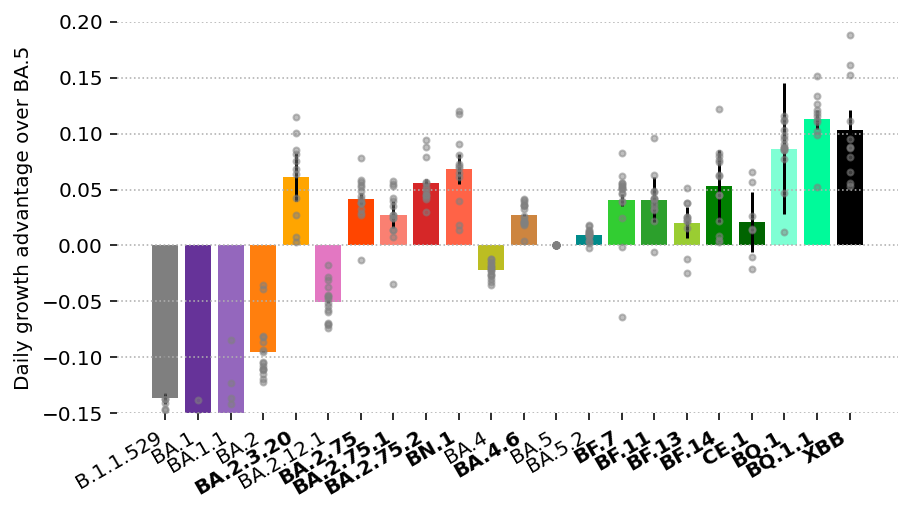

[Text(0, 0, 'B.1.1.529'), Text(1, 0, 'BA.1'), Text(2, 0, 'BA.1.1'), Text(3, 0, 'BA.2'), Text(4, 0, 'BA.2.3.20'), Text(5, 0, 'BA.2.12.1'), Text(6, 0, 'BA.2.75'), Text(7, 0, 'BA.2.75.1'), Text(8, 0, 'BA.2.75.2'), Text(9, 0, 'BN.1'), Text(10, 0, 'BA.4'), Text(11, 0, 'BA.4.6'), Text(12, 0, 'BA.5'), Text(13, 0, 'BA.5.2'), Text(14, 0, 'BF.7'), Text(15, 0, 'BF.11'), Text(16, 0, 'BF.13'), Text(17, 0, 'BF.14'), Text(18, 0, 'CE.1'), Text(19, 0, 'BQ.1'), Text(20, 0, 'BQ.1.1'), Text(21, 0, 'XBB')]


In [295]:
baseline = "BA.5"
#s = pd.DataFrame((b - b[...,[merged_lineages_alias.index(baseline)]]).reshape((-1,b.shape[-1])), columns=merged_lineages_alias)[[x for x in merged_lineages_alias if alias(x, anti_alias=True).startswith("B.1.1.529") or x in escape_lineages]]#.drop(columns="BA.2.3.20")
s = pd.DataFrame((b - b[...,[merged_lineages_alias.index(baseline)]]).reshape((-1,b.shape[-1])), index=pd.MultiIndex.from_product([np.arange(b.shape[0]), genomes.index.levels[0]]), columns=merged_lineages_alias)[[x for x in merged_lineages_alias if alias(x, anti_alias=True).startswith("B.1.1.529") or x in escape_lineages]].swaplevel().sort_index()#.drop(columns="BA.2.3.20")

#s.b§oxplot()
plt.figure(figsize=(7,4))
plt.bar(s.columns, s.iloc[:-1,:].mean(), yerr=2*s.mean(level=1).std(), color=[lineage_colors[x] for x in s.columns])
#plt.errorbar(s.columns, s.iloc[:-1,:].mean(), yerr=2*s.mean(level=1).std(), ecolor='black', marker="", ls="")
plt.scatter(np.tile(s.columns, len(s.index.levels[0])), s.mean(level=0), marker='.', color='grey', zorder=10, alpha=0.5) 

#plt.ylim((-0.15,0.2))
plt.ylim((-0.15,0.2))
#plt.draw()
#lt.xticks(rotation=45)
plt.ylabel(f"Daily growth advantage over {baseline}")
plt.grid(False)
plt.grid(axis="y")
plt.gcf().autofmt_xdate()
plt.draw()
xl = plt.gca().get_xticklabels()
for l in xl:
    if l.get_text() in escape_lineages:
        l.set_weight('bold')
plt.show()
print(xl)

In [243]:
from scipy.special import logit, logsumexp, softmax

In [244]:
def impute_and_extrpolate(model, future=90, time=-10, frac=0.1):    
    #time = -10 ## time point
    ll = model.get_logits()
    p = model.get_probabilities()[:,:,[time]]
    lbd = model.get_lambda()[:,:,[time]]
    p0 = (p * lbd).sum(1, keepdims=True) / lbd.sum(1, keepdims=True) + 1e-34 ## National average at i
    lg0 =logit(p0) 
    l0 = np.array(ll[:,:,[time],:])
    ls = logsumexp(l0,-1, keepdims=True)
    w = l0 < -1e-5
    l0[w] = (np.ones(l0.shape) * ls + lg0 + np.log(frac))[w] #+ np.log(1e-3)
    b1 = np.array(model.posterior['b1'])
    b1[b1==0] = np.nan
    b = np.nanmean(b1, axis=1, keepdims=True)
    b[...,-1]=0
    ll = np.concatenate([ll[:,:,:time], 
                         l0 + np.arange(1,future).reshape((1,1,-1,1)) * b] ,
                        axis=2)
    pp = softmax(ll, axis=-1)
    return pp

In [245]:
pp = impute_and_extrpolate(model, frac=0.01)

/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


In [246]:
pp.shape

(100, 16, 424, 25)

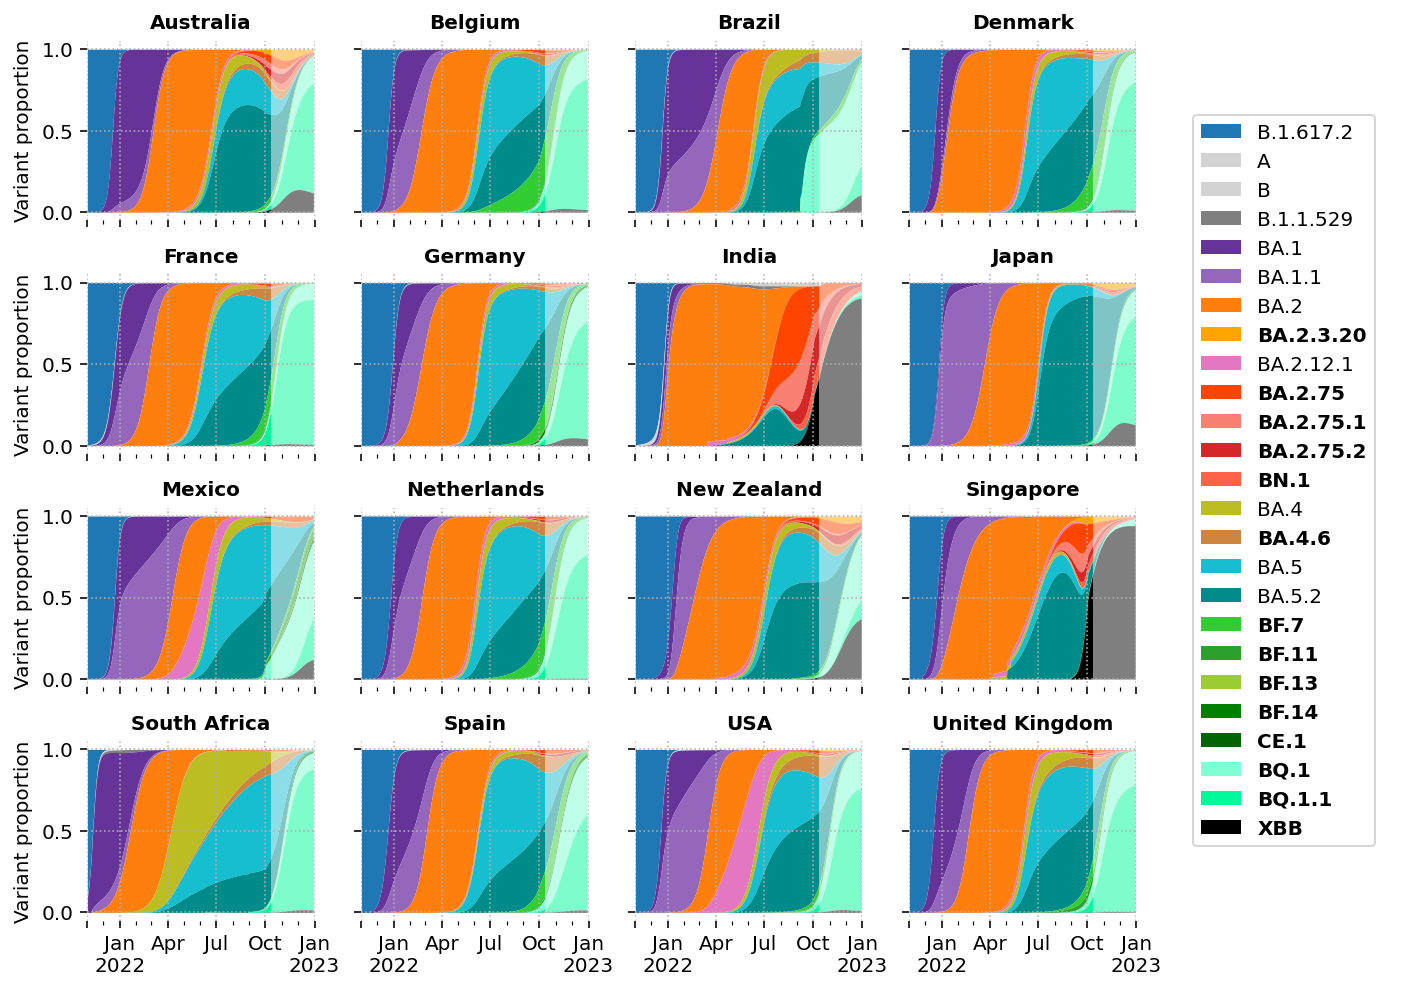

In [247]:
fig, axs = plt.subplots(4,5, figsize=(10,7), sharex=True, sharey=True)
#ax = [ax]
ax = axs[:,:-1].flatten()
#col = ['C7','C3',"C4","C1", "C6","C5","C8" ,"C9", "C7","C0"]
#labels =[alias(x) for x in merged_lineages]
col = lineage_colors #dict(zip(labels, col))
for i,r in enumerate(genomes.index.levels[0]):
    #y = pd.DataFrame(λ[i,:,:]/λ[i].sum(-1, keepdims=True), columns=merged_lineages_alias, index=cases_land.columns[1] + np.arange(λ.shape[1]).astype('timedelta64[D]')) #cases_land.loc[r].loc["2021-12-01":,'AnzahlFall'] / capita[r] * 1000 #* 700
    y = pd.DataFrame(pp[:,i].mean(0).squeeze(), columns=merged_lineages_alias, index=genomes.index.levels[1][0] + np.arange(pp.shape[2]).astype('timedelta64[D]')) #cases_land.loc[r].loc["2021-12-01":,'AnzahlFall'] / capita[r] * 1000 #* 700
    #y = y.drop(columns=["B.1.1.529","Other"])
    y = y.iloc[:,[i-1  for i in range(y.shape[1])]].iloc[:,::-1].cumsum(1)#* 1000 * 700
    #y.index.name = 'date'
    #x = prop_bl.loc[r,:,:][0].unstack()
    #z = x[0.5] * y
    y["BA.1"].plot(ax=ax[i], ls="", label="")
    #(cases_land.loc[r]/capita[r]*1000 * 700).plot(ax=ax[i], marker=".", markersize=1.3, color="k", ls="", label="")
    for j in range(y.shape[1]-1,-1,-1):
        ax[i].fill_between(y.index, y.iloc[:,j-1] if j > 0 else 0, y.iloc[:,j], color=col[y.columns[j]], alpha=1, lw=0, label=y.columns[j])
    #ax[i].fill_between(y.index, y["BA.2"], y["BA.1"], color='C3', alpha=1, lw=0, label="BA.1")
    #ax[i].fill_between(y.index, y["B.1.617.2"], y["BA.2"], color='C1', alpha=1, lw=0, label="BA.2")
    #ax[i].fill_between(y.index, y["B.1.617.2"], color='C0', alpha=.5, lw=0, label="B.1.617.2")
    #ax[i].fill_between(z.index, y-x[0.95]*y, y-x[0.5]*y, color='none',alpha=1, lw=0, label="Omicron", hatch="//////", edgecolor="C3")
    ax[i].set_title(r, size=10 , weight='bold')
    ax[i].set_xlabel(None)
    #ax[i].set_ylabel("Cases / 7d / 100k")
    ax[i].grid(ls=":")
    #ax[i].set_xlim(("2021-12-01",None))
    #ax[i].set_yscale("log")
    #ax[i].set_ylim((0,100))

    for a in ax[i].spines.values():
        a.set_visible(False)
    ax[i].axvspan(genomes.index.levels[1][-1], y.index[-1], facecolor='w',alpha=0.5, lw=0.5)
    ax[i].set_ylabel('Variant proportion')
    ax[i].set_xlim((None,"2023-01-01"))



#ax[-1].legend(loc='upper left', title=None, ncol=4)
gs = axs[0,-1].get_gridspec()
# remove the underlying axes
for a in axs[:,-1]:
    a.remove()
lax = fig.add_subplot(gs[:,-1])
lax.grid(False)
lax.axison = False
h, l = ax[i].get_legend_handles_labels()
leg = lax.legend(h,l, title=None, ncol=1, loc='center left')
for l in leg.get_texts():
    if l.get_text() in escape_lineages:
        l.set_weight('bold')
    
plt.tight_layout()
#fig.savefig("plots/omi_share_by_area.png",dpi=200,bbox_inches='tight',pad_inches=0.2)